In [8]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException, WebDriverException
from bs4 import BeautifulSoup
import time
import csv

# Define the dictionary of directors
directors = {
    'Christopher Nolan': 'https://www.imdb.com/name/nm0634240/?ref_=ls_t_1',
    'David Fincher': 'https://www.imdb.com/name/nm0000399/?ref_=nm_rvi_nm_t_2',
    'Martin Scorsese': 'https://www.imdb.com/name/nm0000217/',
    'Quentin Tarantino': 'https://www.imdb.com/name/nm0000233/', 
    'Steven Spielberg': 'https://www.imdb.com/name/nm0000229/',
    'Ridley Scott': 'https://www.imdb.com/name/nm0000631/', 
    'James Cameron': 'https://www.imdb.com/name/nm0000116/',
    'Frank Darabont': 'https://www.imdb.com/name/nm0001104/?ref_=ls_t_3',  
    'Sam Mendes': 'https://www.imdb.com/name/nm0005222/?ref_=ls_t_8',  
    'Jordan Peele': 'https://www.imdb.com/name/nm1443502/?ref_=ls_rvi_nm_i_5',  
}

# Initialize the WebDriver
driver = webdriver.Chrome()

# Open CSV file for writing
with open('movies.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Director', 'Title', 'Link'])  # Write header row

    for director, url in directors.items():
        try:
            driver.get(url)
            time.sleep(3)  # Allow time for page to load
            
            # Click "Load More" button if available
            try:
                button = driver.find_element(By.XPATH, '//*[@id="director-previous-projects"]/div[1]/label')
                driver.execute_script("arguments[0].scrollIntoView(true);", button)
                time.sleep(1)
                button.click()
            except NoSuchElementException:
                print(f"No 'Load More' button found for {director}")

            # Get the page source and parse it with BeautifulSoup
            soup = BeautifulSoup(driver.page_source, 'html.parser')
            movies = soup.find_all('a', class_='ipc-metadata-list-summary-item__t')

            # Write movie data to CSV
            for movie in movies:
                title = movie.get_text()
                link = movie['href']
                writer.writerow([director, title, f"https://www.imdb.com{link}"])

        except WebDriverException as e:
            print(f"WebDriverException encountered for {director}: {e}")
        except Exception as e:
            print(f"An error occurred for {director}: {e}")

# Close the WebDriver
driver.quit()


No 'Load More' button found for Quentin Tarantino
WebDriverException encountered for Steven Spielberg: Message: element click intercepted: Element is not clickable at point (431, 3435)
  (Session info: chrome=127.0.6533.120)
Stacktrace:
0   chromedriver                        0x0000000102d09024 cxxbridge1$str$ptr + 1887276
1   chromedriver                        0x0000000102d01700 cxxbridge1$str$ptr + 1856264
2   chromedriver                        0x000000010291082c cxxbridge1$string$len + 88524
3   chromedriver                        0x000000010295a020 cxxbridge1$string$len + 389568
4   chromedriver                        0x000000010295864c cxxbridge1$string$len + 382956
5   chromedriver                        0x0000000102956878 cxxbridge1$string$len + 375320
6   chromedriver                        0x0000000102955dc4 cxxbridge1$string$len + 372580
7   chromedriver                        0x000000010294b3a8 cxxbridge1$string$len + 329032
8   chromedriver                        0x000000

In [14]:
import pandas as pd
import time
from selenium import webdriver
from bs4 import BeautifulSoup
from webdriver_manager.chrome import ChromeDriverManager

# Configure Selenium WebDriver

driver = webdriver.Chrome()

def get_cast(movie_link):
    try:
        # Open the movie page
        driver.get(movie_link)
        time.sleep(1)  # Wait for the page to load
        
        # Parse the page with BeautifulSoup
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        
        # Find the cast list using the provided class name
        cast_elements = soup.find_all(class_='sc-bfec09a1-1 KeEFX')
        
        # Extract and return cast names
        cast_list = [elem.get_text() for elem in cast_elements]
        return ', '.join(cast_list)
    except Exception as e:
        print(f"Error fetching cast for {movie_link}: {e}")
        return None

# Load the CSV file
df = pd.read_csv('all_imdb_movies_box_office_data.csv')

# Add a new column for the cast
df['Cast'] = df['Movie_Link'].apply(get_cast)

# Save the updated DataFrame to a new CSV file
df.to_csv('updated_imdb_movies_box_office_data.csv', index=False)

print("Data scraping complete and file saved.")

# Close the WebDriver
driver.quit()


Data scraping complete and file saved.


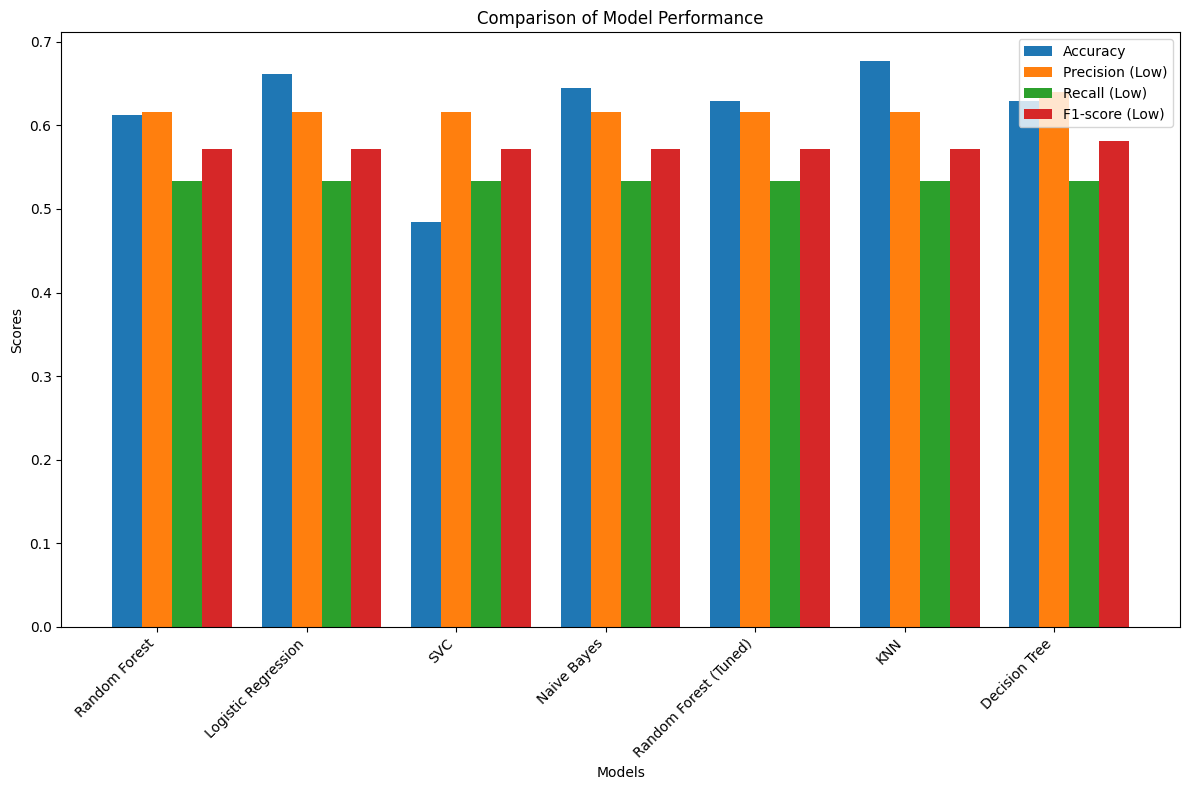

In [15]:
import matplotlib.pyplot as plt
import numpy as np

models = ['Random Forest', 'Logistic Regression', 'SVC', 'Naive Bayes', 'Random Forest (Tuned)', 'KNN', 'Decision Tree']
accuracy = [0.6129, 0.6613, 0.4839, 0.6452, 0.6290, 0.6774, 0.6290]
precision_low = [0.6154, 0.6154, 0.6154, 0.6154, 0.6154, 0.6154, 0.6400]
recall_low = [0.5333, 0.5333, 0.5333, 0.5333, 0.5333, 0.5333, 0.5333]
f1_low = [0.5714, 0.5714, 0.5714, 0.5714, 0.5714, 0.5714, 0.5818]

x = np.arange(len(models))  # The label locations
width = 0.2  # The width of the bars

fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.bar(x - width, accuracy, width, label='Accuracy')
rects2 = ax.bar(x, precision_low, width, label='Precision (Low)')
rects3 = ax.bar(x + width, recall_low, width, label='Recall (Low)')
rects4 = ax.bar(x + 2*width, f1_low, width, label='F1-score (Low)')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performance')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha="right")
ax.legend()

fig.tight_layout()

plt.show()
